In [77]:
import pandas as pd
import sqlalchemy as db
from matplotlib import pyplot as plt
import seaborn as sns
import functions as f
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [78]:
engine = db.create_engine('sqlite:///stocks_formatted.db')

In [79]:
df_prices = pd.read_sql_table('price_close', con=engine)

In [80]:
jaccard_df = pd.read_csv('jaccard.csv')

In [81]:
jaccard_df.drop(columns=['Unnamed: 0'],inplace=True)

clean jaccard scoere table

In [82]:
jaccard_df['Symbol'] = jaccard_df['0'].apply(lambda x: x.split()[0])

In [83]:
jaccard_df['Symbol'] = jaccard_df['Symbol'].apply(lambda x: x[2:-2])

In [84]:
jaccard_df['Year'] = jaccard_df['0'].apply(lambda x: x.split()[1])

In [85]:
jaccard_df['Year'] = jaccard_df['Year'].apply(lambda x: x[:-1])

In [86]:
jaccard_df.drop(columns = ['0'],inplace=True)

In [87]:
jaccard_df.columns = ['jaccard_score', 'symbol', 'year']

In [88]:
jaccard_df.set_index('symbol', inplace=True)

calculate 8 month percentagre change in price from jan

In [89]:
df_prices.set_index('date', inplace=True)
df_prices.drop(columns=['index'], inplace=True)

In [90]:
df_prices.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WU,WY,WHR,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM
date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,136.45,52.48,39.27,51.22,82.95,18.300,123.50,59.09,113.55,4.09,...,17.06,31.00,159.01,39.25,204.77,27.82,12.05,45.78,34.63,75.05
2014-01-08,136.63,52.15,39.20,50.36,82.15,18.340,110.03,58.90,112.30,4.18,...,17.42,30.82,157.60,39.16,205.29,27.71,12.08,45.91,34.49,76.53
2014-01-07,137.65,52.75,38.85,50.49,81.52,18.315,109.44,58.97,113.18,4.18,...,17.44,31.11,154.58,39.01,201.51,27.82,12.19,45.52,34.51,76.56
2014-01-06,137.63,53.27,39.15,50.39,80.54,18.080,106.28,58.12,111.80,4.13,...,17.06,31.02,154.45,38.40,195.86,27.35,12.09,45.42,34.41,75.50
2014-01-03,138.45,53.31,38.64,52.30,81.40,18.290,108.15,59.16,112.88,4.00,...,16.92,31.34,156.90,38.03,196.00,27.50,11.99,45.62,34.47,75.56


In [91]:
df_returns = f.transform_to_august_returns(df_prices)

ValueError: could not convert string to float: 'Agilent Technologies, Inc.'

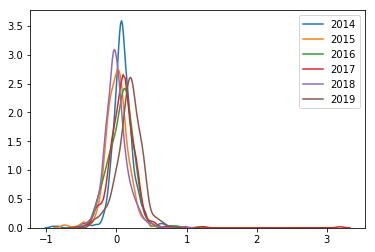

In [177]:
for col in df_returns.columns:
    sns.kdeplot(df_returns[col])

In [93]:
sp_500_df = pd.read_csv('sp500_daily.csv')

In [94]:
sp_500_df.set_index(['Date'], inplace= True)

In [95]:
sp_500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3581150000


In [96]:
nasdaq = pd.read_csv('csv/NASDAQ.csv')
amex = pd.read_csv('csv/AMEX.csv')
nyse = pd.read_csv('csv/NYSE.csv')

In [97]:
df = pd.concat([nasdaq, amex, nyse])

In [98]:
df.set_index('Symbol', inplace = True)

In [99]:
df.drop(columns = ['LastSale', 'IPOyear', 'Unnamed: 8', 'Summary Quote'], inplace=True)

In [100]:
df.dropna(inplace=True)

In [101]:
df.dtypes

Name         object
MarketCap    object
Sector       object
industry     object
dtype: object

In [102]:
#transform market cap 
df['MarketCap'] = df['MarketCap'].apply(lambda x: x[1:-2])

In [103]:
df.MarketCap = pd.to_numeric(df.MarketCap)

In [104]:
df.MarketCap = np.log(df.MarketCap)

In [105]:
df.MarketCap.head()

Symbol
YI       6.013960
PIH      1.098612
PIHPP    2.862201
TURN     4.104295
FLWS     0.182322
Name: MarketCap, dtype: float64

In [106]:
df_returns = df_returns.join(df, how='left')

In [107]:
df_returns = df_returns.join(pd.get_dummies(df_returns.Sector), how='left')

In [108]:
df_returns.head()

,2014,2015,2016,2017,2018,2019,Name,MarketCap,Sector,industry,...,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
A,0.023366,-0.032051,0.096092,0.271886,-0.090680,0.153600,"Agilent Technologies, Inc.",3.139833,Capital Goods,Biotechnology: Laboratory Analytical Instruments,...,0,0,0,0,0,0,0,0,0,0
AAL,0.652600,-0.280282,-0.283060,0.088337,-0.276090,0.012315,"American Airlines Group, Inc.",2.681022,Transportation,Air Freight/Delivery Services,...,0,0,0,0,0,0,0,0,0,1
AAP,0.191797,0.025795,0.079414,-0.305920,0.269677,-0.008422,Advance Auto Parts Inc,2.415914,Consumer Services,Other Specialty Stores,...,0,0,1,0,0,0,0,0,0,0
AAPL,-0.827129,0.157962,-0.089796,0.235471,0.086613,0.276279,Apple Inc.,6.840547,Technology,Computer Manufacturing,...,0,0,0,0,0,0,0,0,1,0
ABBV,0.087763,0.039763,0.088526,0.160391,-0.053856,-0.177407,AbbVie Inc.,4.662495,Health Care,Major Pharmaceuticals,...,0,0,0,0,0,1,0,0,0,0


In [109]:
df = df_returns.join(jaccard_df, how='left')

In [110]:
df.dropna(inplace = True)

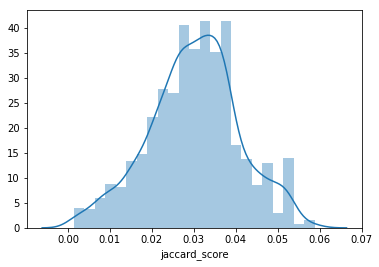

In [174]:
sns.distplot(df['jaccard_score'])
plt.savefig("jaccard hist.png")

In [112]:
type(list(pd.qcut(df.jaccard_score, 5).unique())[0])

pandas._libs.interval.Interval

In [113]:
quint_dict = {}
x = [3,5,4,2,1]
for i, j in enumerate(list(pd.qcut(df.jaccard_score, 5).unique())):
    quint_dict[j] = x[i] 
quint_dict
    

{Interval(0.0272, 0.0324, closed='right'): 3,
 Interval(0.0378, 0.0588, closed='right'): 5,
 Interval(0.0324, 0.0378, closed='right'): 4,
 Interval(0.00044000000000000007, 0.0213, closed='right'): 2,
 Interval(0.0213, 0.0272, closed='right'): 1}

In [114]:
dummy_frame = pd.DataFrame(pd.qcut(df.jaccard_score, 5))

In [115]:
dummy_frame.head()

,jaccard_score
FB,"(0.0272, 0.0324]"
FBHS,"(0.0378, 0.0588]"
FBHS,"(0.0324, 0.0378]"
FCX,"(0.00044000000000000007, 0.0213]"
FCX,"(0.00044000000000000007, 0.0213]"


In [116]:
dummy_frame['jaccard_quintiles'] = dummy_frame['jaccard_score'].apply(lambda x: quint_dict[x])

In [118]:
df = df.join(pd.get_dummies(dummy_frame['jaccard_quintiles']), how='left')

In [119]:
df

,2014,2015,2016,2017,2018,2019,Name,MarketCap,Sector,industry,...,Public Utilities,Technology,Transportation,jaccard_score,year,2,1,3,4,5
FB,0.247503,0.107839,0.117100,0.270152,0.087862,0.422465,"Facebook, Inc.",6.360611,Technology,"Computer Software: Programming, Data Processing",...,0,1,0,0.031066,2019,0,0,1,0,0
FBHS,-0.113646,0.026345,0.058673,0.213769,-0.223451,0.491948,"Fortune Brands Home & Security, Inc.",2.028148,Basic Industries,Homebuilding,...,0,0,0,0.038371,2018,0,0,0,0,1
FBHS,-0.113646,0.026345,0.058673,0.213769,-0.223451,0.491948,"Fortune Brands Home & Security, Inc.",2.028148,Basic Industries,Homebuilding,...,0,0,0,0.038371,2018,0,0,0,1,0
FBHS,-0.113646,0.026345,0.058673,0.213769,-0.223451,0.491948,"Fortune Brands Home & Security, Inc.",2.028148,Basic Industries,Homebuilding,...,0,0,0,0.035291,2019,0,0,0,0,1
FBHS,-0.113646,0.026345,0.058673,0.213769,-0.223451,0.491948,"Fortune Brands Home & Security, Inc.",2.028148,Basic Industries,Homebuilding,...,0,0,0,0.035291,2019,0,0,0,1,0
FCX,-0.012594,-0.218684,0.732824,-0.114659,-0.132018,0.105212,"Freeport-McMoran, Inc.",2.760010,Basic Industries,Precious Metals,...,0,0,0,0.008125,2018,1,0,0,0,0
FCX,-0.012594,-0.218684,0.732824,-0.114659,-0.132018,0.105212,"Freeport-McMoran, Inc.",2.760010,Basic Industries,Precious Metals,...,0,0,0,0.008125,2018,1,0,0,0,0
FCX,-0.012594,-0.218684,0.732824,-0.114659,-0.132018,0.105212,"Freeport-McMoran, Inc.",2.760010,Basic Industries,Precious Metals,...,0,0,0,0.017146,2019,1,0,0,0,0
FCX,-0.012594,-0.218684,0.732824,-0.114659,-0.132018,0.105212,"Freeport-McMoran, Inc.",2.760010,Basic Industries,Precious Metals,...,0,0,0,0.017146,2019,1,0,0,0,0
FDX,0.088040,-0.015309,0.072579,0.158125,-0.109511,-0.001348,FedEx Corporation,3.728100,Transportation,Air Freight/Delivery Services,...,0,0,1,0.023673,2018,0,1,0,0,0


In [120]:
df['returns'] = (df['2019'])

In [130]:
df_2018 = df[df.year == '2018']
df_2019 = df[df.year == '2019']

In [132]:
df_lowjaccard = df_2019[df_2019.jaccard_score <= df_2019.jaccard_score.quantile(0.10)]['2019']

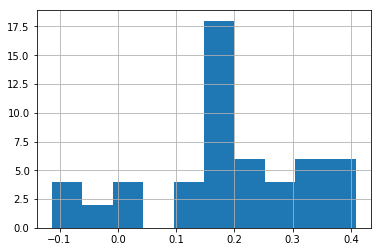

In [133]:
df_lowjaccard.hist()

In [134]:
df_highjaccard = df_2019[df_2019.jaccard_score >= df_2019.jaccard_score.quantile(0.20)]['2019']

In [135]:
df_highjaccard.mean()

0.1658665850889137

In [136]:
df['2019'].mean()

0.1729856023259516

In [138]:
df_2019.returns

FB      0.422465
FBHS    0.491948
FBHS    0.491948
FCX     0.105212
FCX     0.105212
FE      0.163943
FE      0.163943
FIS     0.228138
FIS     0.228138
FISV    0.281124
FISV    0.281124
FITB    0.170248
FITB    0.170248
FL     -0.199583
FL     -0.199583
FLIR    0.256208
FLIR    0.256208
FLR     0.011840
FLR     0.011840
FLS     0.399581
FLS     0.399581
FMC     0.132676
FMC     0.132676
FRT     0.105863
FRT     0.105863
FTI     0.307731
FTI     0.307731
GD      0.160753
GD      0.160753
GE      0.320497
          ...   
WFC     0.015978
WFC     0.015978
WM      0.299482
WM      0.299482
WMB     0.251561
WMB     0.251561
WMT     0.185130
WMT     0.185130
WU      0.165694
WU      0.165694
WY      0.226196
WY      0.226196
WYNN    0.257184
WYNN    0.257184
XEC    -0.042417
XEC    -0.042417
XEL     0.232476
XEL     0.232476
XLNX    0.394934
XLNX    0.394934
XOM     0.098579
XOM     0.098579
XRAY    0.539192
XRAY    0.539192
XRX     0.800298
XRX     0.800298
XYL     0.269132
XYL     0.2691

In [139]:
In [1]: import statsmodels.api as sm


In [140]:
f = 'returns~+Q(2)+Q(3)+Q(4)+Q(5)'
model = smf.ols(f, data=df).fit()
Table = sm.stats.anova_lm(model, typ=2)

In [186]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.421
Date:                Tue, 16 Jul 2019   Prob (F-statistic):              0.225
Time:                        15:13:48   Log-Likelihood:                 370.99
No. Observations:                1085   AIC:                            -732.0
Df Residuals:                    1080   BIC:                            -707.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1545      0.012     12.874      0.000       0.131       0.178
Q(2)           0.0328      0.017      1.952      0.051      -0.000       0.066
Q(3)           0.0084      0.017      0.496      0.620      -0.025       0.042
Q(4)           0.0186      0.017      1.123      0.261      -0.014       0.051
Q(5)           0.0306      0.017      1.846      0.065      -0.002       0.063
==============================================================================
Omnibus:                       40.374   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.404
Skew:                          -0.265   Prob(JB):                     6.97e-17
Kurtosis:                       4.168   Cond. No.                         5.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
print(Table)

             sum_sq      df         F    PR(>F)
Q(2)       0.113100     1.0  3.809970  0.051207
Q(3)       0.007312     1.0  0.246331  0.619772
Q(4)       0.037469     1.0  1.262200  0.261485
Q(5)       0.101187     1.0  3.408668  0.065128
Residual  32.060078  1080.0       NaN       NaN


In [142]:
smean = df_lowjaccard

In [143]:
from scipy import stats      

In [ ]:
stats.ttest_1samp(a=smean, popmean= df_2019.jaccard_score.mean())

In [144]:
stats.ttest_1samp(a=smean, popmean= df_2019.jaccard_score.mean())

Ttest_1sampResult(statistic=8.715639170451011, pvalue=8.191741499293817e-12)

In [185]:
(df['2019'].mean() - smean.mean())/df['2019'].mean()

-0.10234521882195527

In [231]:
df_low2018 = df_2018[df_2018.jaccard_score<=df_2018.jaccard_score.quantile(.2)]['2018']

In [232]:
stats.ttest_ind(a=df_low2018_compare,b=df_low2019_compare,equal_var=False)

Ttest_indResult(statistic=-0.598651901429536, pvalue=0.553240269431968)

,index,2019
48,VMC,0.409058
14,MA,0.405977
7,HLT,0.399774
26,NSC,0.343587
4,GE,0.320497
16,MAR,0.314256
12,KSU,0.281084
28,OKE,0.278993
38,SJM,0.241052
20,MET,0.211663


In [226]:
df_low2018_compare = df_low2018 - df['2018'].mean()

In [229]:
df_low2019_compare = df_lowjaccard.iloc[:,1] - df['2019'].mean()

In [150]:
df_low2018_compare.mean()

0.0006649888624762968

In [151]:
(df_lowjaccard.mean() - df['2019'].mean())/df['2019'].mean()

0.10234521882195527

In [152]:
(df_low2018.mean() - df['2018'].mean())/df['2018'].mean()

-0.04177853227397712

In [153]:
df_low2018.mean()

-0.015252010282333651

In [154]:
df['2018'].mean()

-0.01591699914480996

In [155]:
df_high2018 = df_2018[df_2018.jaccard_score>=df_2018.jaccard_score.quantile(.8)]['2018']

In [156]:
df_high2019 = df_2018[df_2018.jaccard_score>=df_2018.jaccard_score.quantile(.8)]['2019']

In [157]:
df_high2019.mean()

0.03417378060141032

In [167]:
df['2019'].mean()

0.1729856023259516

In [159]:
df['2018'].mean()

-0.01591699914480996

In [160]:
df['2019'].mean()

0.1729856023259516

In [ ]:
df.rename

In [161]:
df_lowjaccard = df_lowjaccard.reset_index().sort_values(by='2019',ascending=False)

In [162]:
df_lowjaccard = df_lowjaccard[df_lowjaccard.duplicated()==False]

In [203]:
s = ""
col = df.columns[10:22].to_list()
for i in col:
    i.replace(' ', '')
    s = s +i+'+'
s = s[:-1]


In [214]:
x = "".join(s.split())

In [224]:
col2=[]
for i in col:
    col2.append(" ".join(i.split()))
df.rename(columns=dict(zip(col,col2)), inplace=True)

In [225]:
df.columns[10:22]

Index(['Basic Industries', 'Capital Goods', 'Consumer Durables',
       'Consumer Non-Durables', 'Consumer Services', 'Energy', 'Finance',
       'Health Care', 'Miscellaneous', 'Public Utilities', 'Technology',
       'Transportation'],
      dtype='object')

In [218]:
y = df.jaccard_score

In [219]:
model = smf.ols(y).fit()
Table = sm.stats.anova_lm(model, typ=2)

PatsyError: model is missing required outcome variables

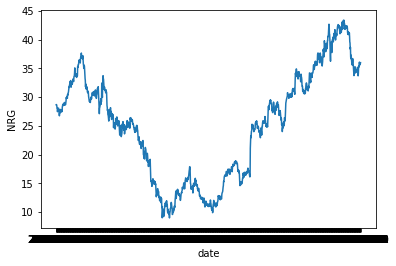

In [164]:
sns.lineplot(x = df_prices.index, y = df_prices['NRG'])